In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[]

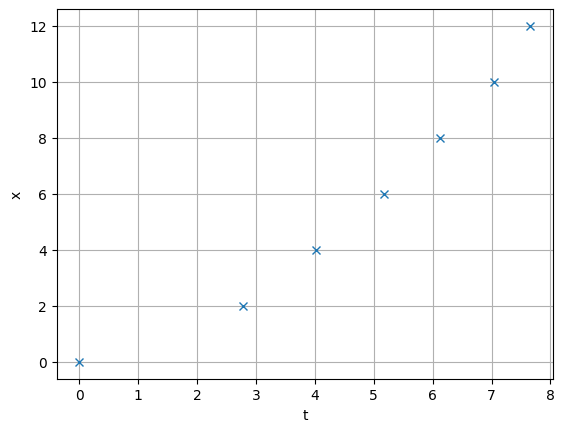

In [21]:
df = pd.read_csv("katseI.csv")
plt.ylabel("x")
plt.xlabel("t")
plt.plot(df["t"],df["x"], "x")

plt.grid()
plt.plot()

In [22]:
parabool, cov = np.polyfit(df["t"], df["x"], 2, cov = True)
määramatus = np.sqrt(np.diag(cov))

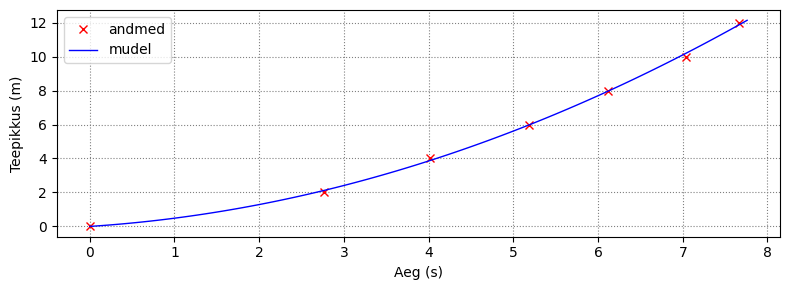

In [23]:
plt.figure( figsize=(8, 3) )
plt.plot(df["t"], df["x"], 'rx', label='andmed',lw='1')
t_1 = np.linspace(df["t"][0], df["t"][len(df["t"])-1] + 0.1, 100) # muutuja ruutfunktsiooni graafiku jaoks
x_1 = np.polyval(parabool, t_1)   # ruutfunktsiooni graafik
plt.plot(t_1, x_1, 'b-', label='mudel',lw='1')
plt.grid(color='gray', linestyle=':')
plt.xlabel('Aeg (s)')
plt.ylabel('Teepikkus (m)')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
m_a = 0.23623  #aeroauto mass
Δm_a = 0.00001 

print('Kiirendus : (%2.2f ± %5.2f) m/s^2' % (parabool[0]*2, määramatus[0]*1.96*2))
print('Jõud      : (%2.3f ± %5.3f) N' % (parabool[0]*2 * m_a, m_a* määramatus[0]*1.96*2))

Kiirendus : (0.32 ±  0.04) m/s^2
Jõud      : (0.076 ± 0.009) N


# II KATSE

In [25]:
m_v = 0.27238  #plaadiga aeroauto mass II katses
Δm_v = 0.00001 

In [26]:
koguAndmestik = pd.read_csv("katseII.csv", sep='\\s+')

In [27]:
koguAndmestik

,t,s,v,a,-
0,"0,00","0,340","1,045","-1,562",NaN
1,"0,05","0,396","0,964","-1,419",NaN
2,"0,10","0,440","0,882","-1,085",NaN
3,"0,15","0,481","0,860","-0,825",NaN
4,"0,20","0,527","0,816","-0,868",NaN
...,...,...,...,...,...
61,"3,05","0,441","-0,459","-0,238",NaN
62,"3,10","0,417","-0,472","-0,236",NaN
63,"3,15","0,393","-0,483","-0,223",NaN
64,"3,20","0,369","-0,495","-0,213",NaN


Kasutan kogu Vernier' andmestikku, sealhulgas kiiruse ja kiirenduse infot.
Komad on nõmedad.

In [28]:
t = np.array(koguAndmestik["t"])
t = np.array([float(x.replace(",", ".")) for x in t])

s = np.array(koguAndmestik["s"])
s = np.array([float(x.replace(",", ".")) for x in s])

v = np.array(koguAndmestik["v"])
v = np.array([float(x.replace(",", ".")) for x in v])

a = np.array(koguAndmestik["a"])
a = np.array([float(x.replace(",", ".")) for x in a])

In [29]:
t[t>0.2].shape, t.shape
#tuleb eemaldada 5 punkti algusest

((61,), (66,))

In [30]:
#viilutamine
t = t[5:]
v = v[5:]
s = s[5:]
a = a[5:]

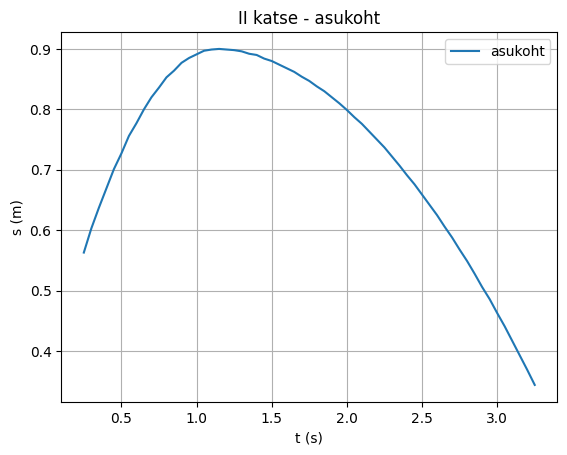

In [31]:
plt.plot(t, s, label = "asukoht")
plt.legend()
plt.title("II katse - asukoht")
plt.ylabel("s (m)")
plt.xlabel("t (s)")
plt.grid()
plt.show()

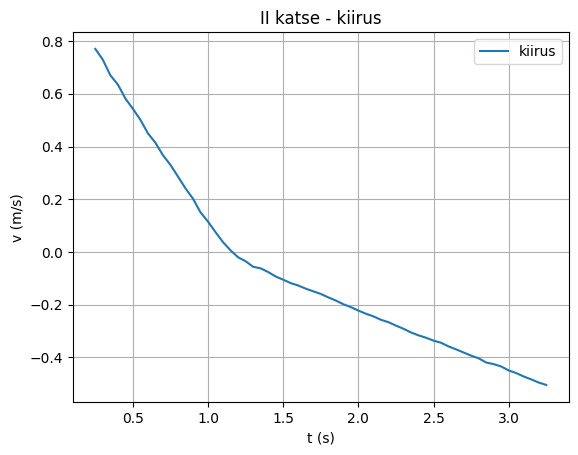

In [32]:
plt.plot(t, v, label = "kiirus")
plt.legend()
plt.title("II katse - kiirus")
plt.ylabel("v (m/s)")
plt.xlabel("t (s)")
plt.grid()
plt.show()

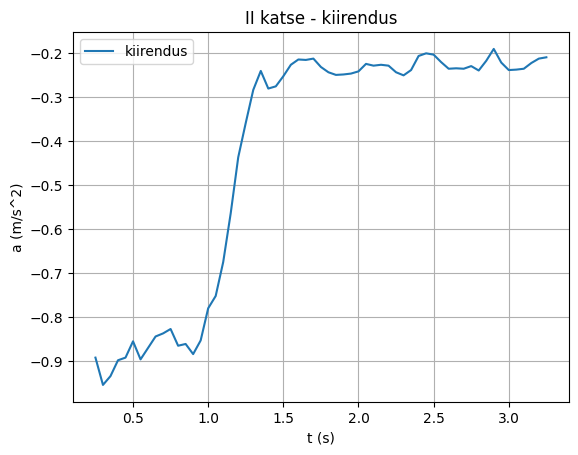

In [39]:
plt.plot(t, a, label = "kiirendus")
plt.legend()
plt.title("II katse - kiirendus")
plt.ylabel("a (m/s^2)")
plt.xlabel("t (s)")
plt.grid()
plt.show()

## Süsteemi dünaamika: sobitamine parabooliga
$$ m\ddot{x} = F_{vedu} - sign(\dot{x}) \cdot F_{takistus}  $$

Kuna selle DV lahendid on kahes tükis erinevate kordajatega paraboolid, siis saab seda dünaamikat modelleerida lihtsa vähim-ruut sobitamise teel. 

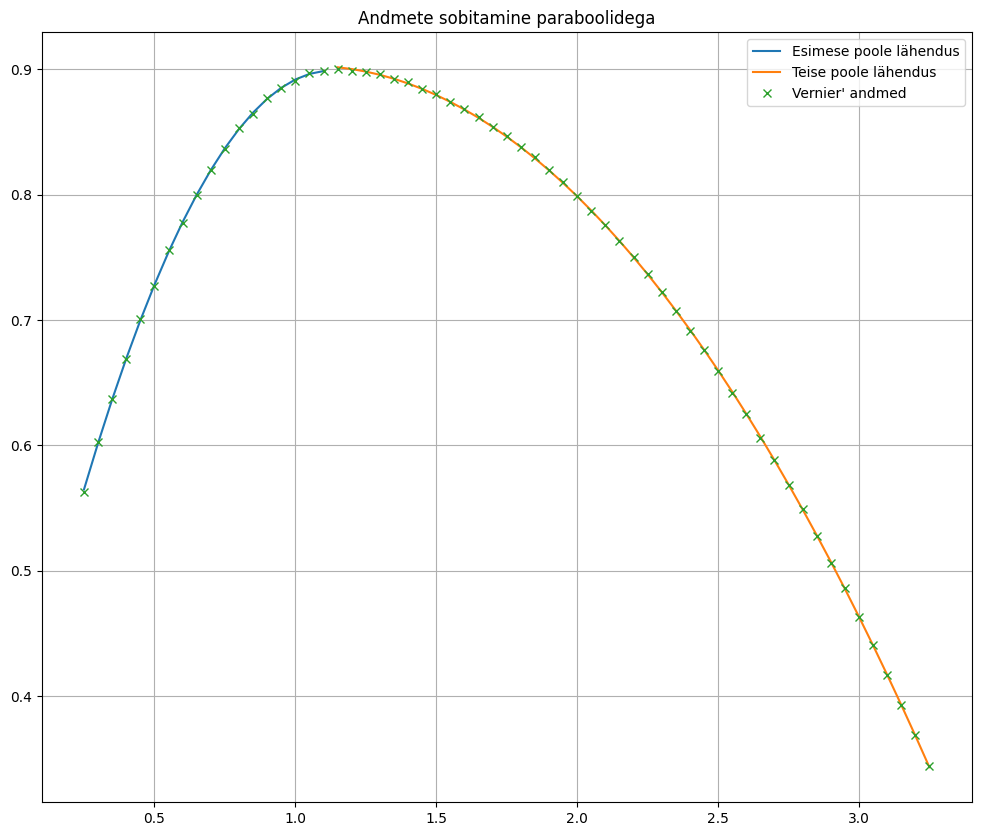

Kiirendus aeglustuval liikumisel:(-0.8675 ± 0.0169) m/s^2 
Kiirendus kiireneval liikumisel: (-0.2316 ± 0.0012) m/s^2 
(veokiirendus + takistuskiirendus)/2 = 0.4337461300309614; (veokiirendus - takistuskiirendus)/2 = 0.11580860055051707
veokiirendus = 0.5495547305814785
takistuskiirendus = 0.3179375294804443
0.3179375294804443
Aeroauto takistusjõud selles katses: 0.0866 ± 0.0012 N
Aeroauto veojõud selles katses: 0.1497 ± 0.0044 N


In [33]:
keskmineIndeks = np.argmax(s)

s_Algus = s[:keskmineIndeks]
s_Lõpp = s[keskmineIndeks:]
t_Algus = t[:keskmineIndeks]
t_Lõpp = t[keskmineIndeks:]


par1, cov1 = np.polyfit(t_Algus, s_Algus,2, cov = True)
par2, cov2 = np.polyfit(t_Lõpp, s_Lõpp, 2, cov = True)

lahend1_algus = np.poly1d(par1)(t_Algus)
lahend1_lõpp = np.poly1d(par2)(t_Lõpp)


plt.figure(figsize=(12,10))
plt.title("Andmete sobitamine paraboolidega")
plt.plot(t_Algus, lahend1_algus, label = "Esimese poole lähendus")
plt.plot(t_Lõpp, lahend1_lõpp, label = "Teise poole lähendus")
plt.plot(t, s, "x", label="Vernier' andmed")
plt.legend()
plt.grid()
plt.show()

määramatus = []
määramatus.append(np.sqrt(np.diag(cov1)))
määramatus.append(np.sqrt(np.diag(cov2)))
määramatus = np.array(määramatus)
määramatus.shape, määramatus

print('Kiirendus aeglustuval liikumisel:(%2.4f ± %5.4f) m/s^2 ' % (par1[0]*2, määramatus[0][0]*1.96*2)) 
print('Kiirendus kiireneval liikumisel: (%2.4f ± %5.4f) m/s^2 ' % (par2[0]*2, määramatus[1][0]*1.96*2))
print(f"(veokiirendus + takistuskiirendus)/2 = {np.abs(par1[0])}; (veokiirendus - takistuskiirendus)/2 = {np.abs(par2[0])}")

veokiirendus = np.abs((par1[0] + par2[0]))
print(f"veokiirendus = {veokiirendus}")
takistuskiirendus = 2*np.abs(par1[0]) - np.abs(veokiirendus)
print(f"takistuskiirendus = {takistuskiirendus}")

F_t = (takistuskiirendus)*(m_v)
uF_t = ((m_v)/2) * np.sqrt(määramatus[0][0]**2 + määramatus[1][0]**2)
dF_t = 1.96*uF_t
print(takistuskiirendus)
print ('Aeroauto takistusjõud selles katses: %2.4f ± %5.4f N' %(F_t,dF_t))

F_v = (veokiirendus)*m_v
uF_v =np.sqrt(((m_a + m_v) * määramatus[0][0])**2 + uF_t**2)
dF_v = 1.96*uF_v
print ('Aeroauto veojõud selles katses: %2.4f ± %5.4f N' %(F_v,dF_v))

## Minu uuendatud mudel sõiduki dünaamikale

Kuna sõiduk polnud väga aerodünaamiline, siis otsustasin uuendada pakutavat mudelit. Süsteemi kirjeldavale Newtoni II seadusele lisasin juurde liikme, mis vastab õhutakistuse laminaarsele ja turbulentsele komponendile $F_{drag} = -bv^2 - cv^2$. Saame DV kujul


$$ m\ddot{x} = F_{vedu} - sign(\dot{x}) \cdot F_{takistus} -b(\dot{x})\dot{x} - c(\dot{x})\dot{x}^2, $$

kus $F_{takistus}$ mõjub eelduste kohaselt mõlemas suunas sama magnituudiga ning $b$ ja $c$ on õhutakistuse parameetrid, mis sõltuvad kiiruse suunast ja on eelduste kohaselt erineva magnituudiga, sõltuvalt sellest, kas auto sõidab veojõu suunas või vastu.

### Newtoni II seadus DV süsteemina ja selle sobitamine andmetega


Edaspidi veojõud $F_{v}$ ja takistusjõud $F_t$ konstantse väärtusega takistav jõud, mis mõjub liikumisele vastassuunaliselt.
Mõjugu autole veel takistavad jõud, mis on kiirusega lineaarselt ja ruudus võrdelised.

Sellisel juhul on meil II järku DV:

$ \ddot{x}(t) = \frac{F_0}{m} + \frac{b}{m} \dot{x}(t) + \frac{c}{m} \cdot sign(\dot{x}) \cdot (\dot{x}(t))^2 - F_T \cdot sign(\dot{x}(t))$

Ja süsteemina:

$ \dot{v}(t) = \frac{F_0}{m} + \frac{b}{m} v(t) + sign(\dot{x})\frac{c}{m}  v(t)^2 - F_T \cdot sign(\dot{x}(t))$

$ \dot{x}(t) = v $

Üritan sobitada seda pakutavat mudelit numbriliste meetoditega (Runge Kutta DV lahendaja ja Nelder-Mead).

In [64]:
vs_maatriks = np.vstack((v, s))
av_maatriks = np.vstack((a, v))

vs_maatriks[0], vs_maatriks[1]

(array([ 0.77 ,  0.729,  0.67 ,  0.635,  0.582,  0.543,  0.501,  0.45 ,
         0.414,  0.367,  0.33 ,  0.286,  0.241,  0.202,  0.15 ,  0.115,
         0.075,  0.037,  0.006, -0.02 , -0.035, -0.056, -0.062, -0.076,
        -0.093, -0.105, -0.118, -0.127, -0.139, -0.149, -0.159, -0.172,
        -0.184, -0.198, -0.209, -0.222, -0.234, -0.244, -0.257, -0.266,
        -0.279, -0.291, -0.305, -0.316, -0.325, -0.336, -0.344, -0.358,
        -0.369, -0.381, -0.393, -0.403, -0.419, -0.425, -0.434, -0.449,
        -0.459, -0.472, -0.483, -0.495, -0.504]),
 array([0.563, 0.603, 0.637, 0.669, 0.701, 0.727, 0.756, 0.777, 0.8  ,
        0.82 , 0.836, 0.853, 0.864, 0.877, 0.885, 0.891, 0.897, 0.899,
        0.9  , 0.899, 0.898, 0.896, 0.892, 0.89 , 0.884, 0.88 , 0.874,
        0.868, 0.862, 0.854, 0.847, 0.838, 0.83 , 0.82 , 0.81 , 0.799,
        0.787, 0.776, 0.763, 0.75 , 0.737, 0.722, 0.707, 0.691, 0.676,
        0.659, 0.642, 0.625, 0.606, 0.588, 0.568, 0.549, 0.528, 0.506,
        0.486, 0.463

In [66]:
#vs_maatriks = vs_maatriks.T
#av_maatriks = av_maatriks.T

vs_maatriks.shape, av_maatriks.shape #--> (2, 61)

((2, 61), (2, 61))

In [36]:
vs_maatriks[:,0]

array([0.77 , 0.563])

In [37]:
from scipy.integrate import solve_ivp

#2-parameetriline DV, mis ei arvesta õhutakistusjõududega
def pakutavDV2(t, sisend, a, b):
    xdot, x = sisend[:2]

    xddot = a  + b * np.sign(xdot)
    return [xddot, xdot]

#6-parameetriline DV, mida tahame andmestikuga sobitada
#A = F_v/m; B = F_t/m; 
#C = lineaarne takistustegur v < 0 korral
#D = ruuttakistustegur v < 0 korral
#E = lineaarne takistustegur v >= 0 korral
#F = ruuttakistustegur v >= 0 korral
def pakutavDV6(t, sisend, A, B, C, D, E, F):
    xdot, x = sisend[:2]
    if xdot >= 0:
        C = E
        D = F

    xddot = A - B*np.sign(xdot) - np.abs(C)*xdot - np.abs(D)*np.sign(xdot) * xdot**2
    return [xddot, xdot]

#solve_ivp lahendab vaikimisi Runge-Kutta 4-5-ga
def sobita_DV(t, parameetrid, andmed):
    vs0 = andmed[:,0]  #mõõdetud kiiruse ja asukoha algtingimus
    
    #genereerib numbrilise lahendi sisestatud pakutud parameetritega
    #solve_ivp lahendab vaikimisi Runge-Kutta 4-5-ga
    solution = solve_ivp(
        fun=pakutavDV6,
        t_span=[t[0], t[-1]],
        y0=vs0,
        t_eval=t,
        args=tuple(parameetrid),
        method="RK45"
    )
    return solution.y # tagastab nii kiiruse ja asukoha andmevektori 

# kaofunktsioon
def kaofunktsioon(parameetrid, t, andmed):
    
    mudeli_ennustus = sobita_DV(t, parameetrid, andmed)
    v_pred, s_pred = mudeli_ennustus
    v_data, s_data = andmed

    kiiruse_viga = np.sum((v_pred - v_data) ** 2)
    asukoha_viga = np.sum((s_pred - s_data) ** 2)

    return asukoha_viga + kiiruse_viga


from scipy.optimize import minimize

algne_pakkumine = [-0.4, -0.2, 0.03, 0.1, 0.03, 0.1]

result = minimize(kaofunktsioon, algne_pakkumine, args=(t, vs_maatriks), method='Nelder-Mead')

parameetrid_opt = result.x
print("Optimized Parameters:", parameetrid_opt)

Optimized Parameters: [-0.53490139  0.27040393 -0.02703288  0.24243115  0.15094921 -0.01798234]


Üldjuhul on takistav jõud võrdeline kiiruse absoluutväärtusega ning vastassuunaline!

Pakutud sobitatud parameetrid DV jaoks kujul:

$ \ddot{x}(t) = F( \dot{x}, \theta ) = \frac{F_0}{m} + \frac{b}{m} \dot{x}(t) + \frac{c}{m} (\dot{x}(t))^2 - F_T \cdot sign(\dot{x}) $

Mudeli ruutkeskmine viga sobitatud parameetritega:

$\min_{\theta} L(x_{mõõdetud}) = \min_{\theta} |[\textbf{v}^T, \textbf{s}^T]_{mõõdetud}  - [\textbf{v}^T, \textbf{s}^T]_{ennustatud}(\theta)|^2 = 0.0016877611666084324$

Leitud Parameetrid $\theta$:

$\theta = \underset{\theta}{\text{argmin}}\!\ L([\textbf{v}^T, \textbf{s}^T]_{mõõdetud}, \theta) = [A, B, C, D, E, F] = [\frac{F_t}{m}, \frac{F_T}{m}, \frac{b_1}{m} , \frac{c_1}{m}, \frac{b_2}{m} , \frac{c_2}{m} ]$


In [38]:
print("TEISE KATSE TULEMUSED SELLE FANCY MEETODIGA")
print("F_v =",np.abs(parameetrid_opt[0]*m_v), "\nF_t =",np.abs(parameetrid_opt[1]*m_v), "\nmudeli ruutkeskmine viga =", result.fun)

TEISE KATSE TULEMUSED SELLE FANCY MEETODIGA
F_v = 0.1456964412395717 
F_t = 0.07365262231390893 
mudeli ruutkeskmine viga = 0.0016877611666084324


[]

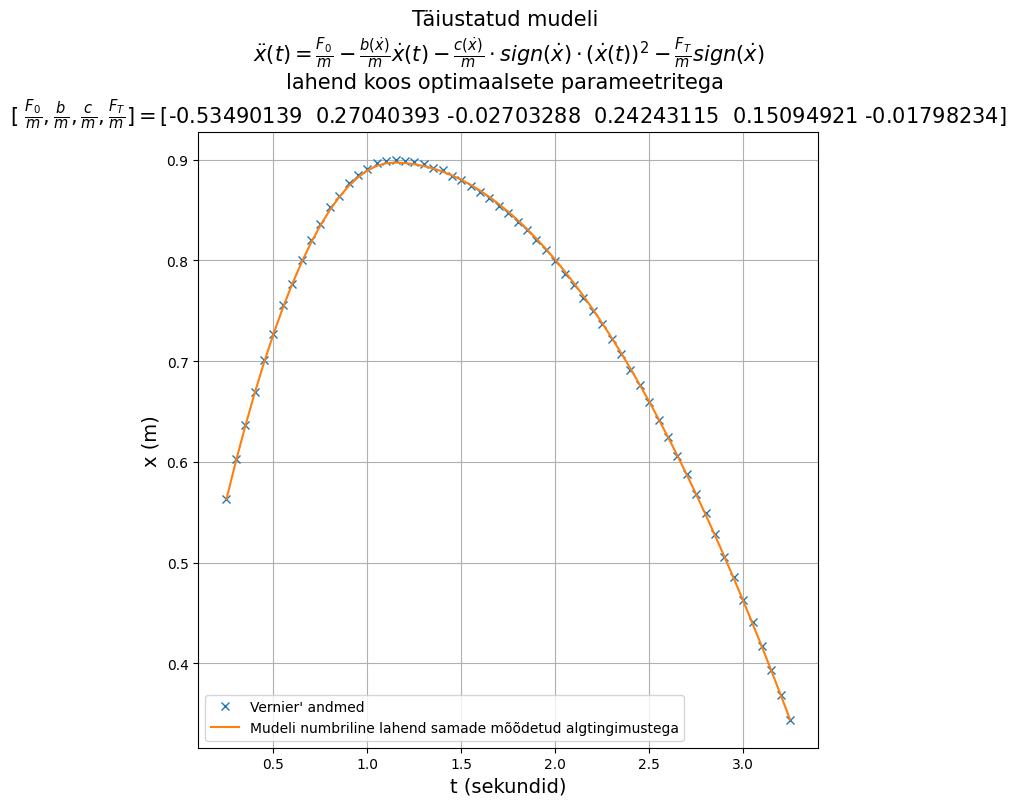

In [39]:
# sobitatud parameetritega lahendi kõver

uuslahend = solve_ivp(pakutavDV6, y0=vs_maatriks[:,0], t_span=[t[0], t[-1]],
        t_eval=t,  args = tuple(parameetrid_opt))

plt.figure(figsize = (8,8))

pealkiri = str("Täiustatud mudeli \n" +  r"$ \ddot{x}(t) = \frac{F_0}{m} - \frac{b(\dot{x})}{m} \dot{x}(t) - \frac{c(\dot{x})}{m} \cdot sign(\dot{x}) \cdot (\dot{x}(t))^2 - \frac{F_T}{m} sign(\dot{x})$" + 
          "\nlahend koos optimaalsete parameetritega \n" + 
          r"[ $\frac{F_0}{m}, \frac{b}{m} , \frac{c}{m}, \frac{F_T}{m}] =$" + f"{parameetrid_opt}")

plt.title(pealkiri, fontsize = 15)
plt.plot(t, s, "x", label = "Vernier' andmed")
plt.plot(t, uuslahend.y[1], label = "Mudeli numbriline lahend samade mõõdetud algtingimustega")

plt.ylabel("x (m)", fontsize = 14)
plt.xlabel("t (sekundid)",  fontsize = 14)
plt.legend()
plt.grid()
plt.plot()

In [40]:
kaofunktsioon(parameetrid_opt, t, vs_maatriks)

0.0016877611666084324

Lähendatud parabool on suurusjärgu võrra täpsem :(

In [41]:
np.sum((uuslahend.y[1] - s)**2), np.sum((lahend1_algus - s_Algus)**2) + np.sum((lahend1_lõpp - s_Lõpp)**2)

(0.00016333391801298455, 3.651371034834661e-05)

[]

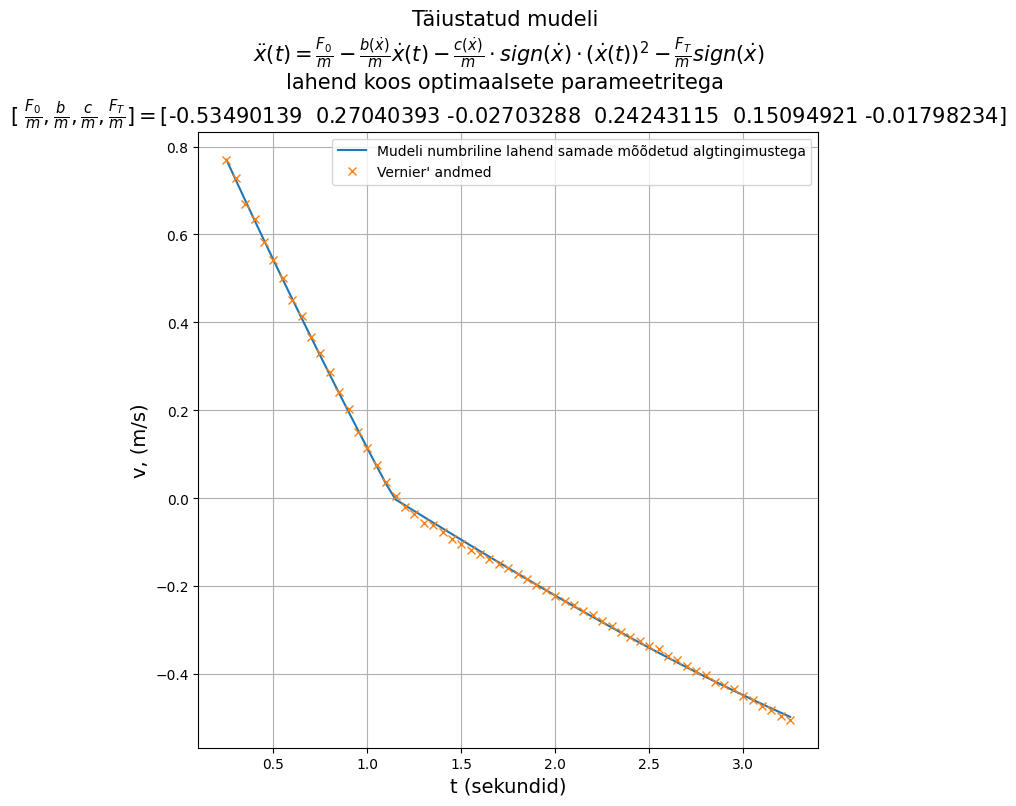

In [42]:
# sobitatud parameetritega lahendi kõver - v
plt.figure(figsize = (8,8))

plt.title(pealkiri, fontsize = 15)
plt.plot(t, uuslahend.y[0], label = "Mudeli numbriline lahend samade mõõdetud algtingimustega")
plt.plot(t, v, "x", label = "Vernier' andmed")


plt.ylabel("v, (m/s)", fontsize = 14)
plt.xlabel("t (sekundid)",  fontsize = 14)
plt.legend()
plt.grid()
plt.plot()


In [43]:
'''# sobitatud parameetritega lahendi kõver - a

#arvutatavad kiirendused genereerid genereeritud datast:
uusLahendKiirendused = [pakutavDV6(t, el, *parameetrid_opt)[0] for el in uuslahend.y.T]

plt.figure(figsize = (8,8))

plt.title(pealkiri, fontsize = 15)
plt.plot(t, uusLahendKiirendused, label = "Mudeli numbriline lahend samade mõõdetud algtingimustega")
plt.plot(t, a_pred, label = "Vernier' andmed")


plt.ylabel("a, (m/s^2)", fontsize = 14)
plt.xlabel("t (sekundid)",  fontsize = 14)
plt.legend()
plt.grid()
plt.plot()'''


'# sobitatud parameetritega lahendi kõver - a\n\n#arvutatavad kiirendused genereerid genereeritud datast:\nuusLahendKiirendused = [pakutavDV6(t, el, *parameetrid_opt)[0] for el in uuslahend.y.T]\n\nplt.figure(figsize = (8,8))\n\nplt.title(pealkiri, fontsize = 15)\nplt.plot(t, uusLahendKiirendused, label = "Mudeli numbriline lahend samade mõõdetud algtingimustega")\nplt.plot(t, a_pred, label = "Vernier\' andmed")\n\n\nplt.ylabel("a, (m/s^2)", fontsize = 14)\nplt.xlabel("t (sekundid)",  fontsize = 14)\nplt.legend()\nplt.grid()\nplt.plot()'

### VEA HINNANG
Diferentsiaalvõrrandi numbrilist lahendit andmestikuga sobitava optimisatsiooni algoritmi optimaalseima parameetrina saadud füüsikalise suuruse viga on väga raske hinnata. Viga võis lisaks mõõtmistele juurde tulla nii ebapiisava optimisatsiooni protsessi kui ka lõpliku täpsusega DV numbrilise integreerimise käigus.

### UUS HÜPOTEES
PLAADI PINDALA SUURENDAMISEL SUURENEVAD TEGURID B JA C VÕRDELISELT! (või kui ei suurene võrdeliselt, siis saab täpsemalt hinnata, kui suur osa takistusjõust on õhutakistus ja kui palju panustab höördejõud)

OPTIMEERITAVATE PARAMEETRITE ERINEVATE ALGPAKKUMISTE PUHUL TULID ERINEVAD LÕPLIKUD PARAMEETRIT KOOS ERINEVATE RUUTKESKMISTE VIGADEGA, MIS KOONDUSID CA 0.05 ÜMBER.

Veokiirendus oli igal erineva tulemusega optimisatsioonil samas vahemikus 0.43 - 0.49 N/kg vahel.
### LOO MORAAL
TUNDUB OLEVAT KESKELTLÄBI HEA MUDEL, KUID ILMSELT ON TEGU PSEUDOTEADUSEGA, SEST ÜHESELT KOONDUVATE PARAMEETRITEGA HEAD MUDELIT EI TEKI

_“With four parameters I can fit an elephant, and with five I can make him wiggle his trunk.” - John von Neumann_

## KATSE RELSIL

In [44]:
m_alus = 0.32328 
Δm_relss = 0.00001
m_v = 0.27239

relsiAndmed = pd.read_csv("katseIII.2.1.txt", sep='\\s+')


t3 = np.array(relsiAndmed["t"])
t3 = np.array([float(x.replace(",", ".")) for x in t3])

s3 = np.array(relsiAndmed["s"])
s3 = np.array([float(x.replace(",", ".")) for x in s3])

v3 = np.array(relsiAndmed["v"])
v3 = np.array([float(x.replace(",", ".")) for x in v3])

a3 = np.array(relsiAndmed["a"])
a3 = np.array([float(x.replace(",", ".")) for x in a3])

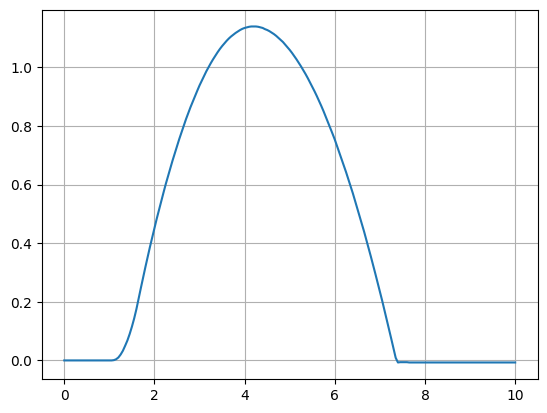

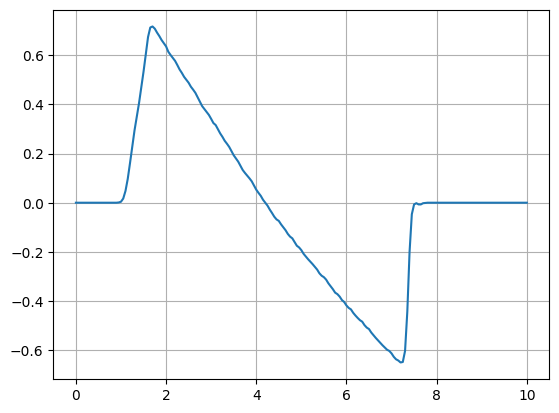

In [45]:
plt.plot(t3, s3)
plt.grid()
plt.show()

plt.plot(t3, v3)
plt.grid()
plt.show()

In [46]:
t3[t3 < 2].size, t3.size -t3[t3 < 6.5].size

(40, 71)

In [47]:
algus = (t3[t3 < 2].size)
lõpp = (t3.size) - (t3[t3 < 6.5].size)

#viilutamise alg ja lõpp-punktid
algus, lõpp

(40, 71)

In [48]:
t3 = t3[algus:-lõpp]
s3 = s3[algus:-lõpp]
v3 = v3[algus:-lõpp]
a3 = a3[algus:-lõpp]

t3.shape, s3.shape

((90,), (90,))

## Relsi katse sobitamine parabooliga

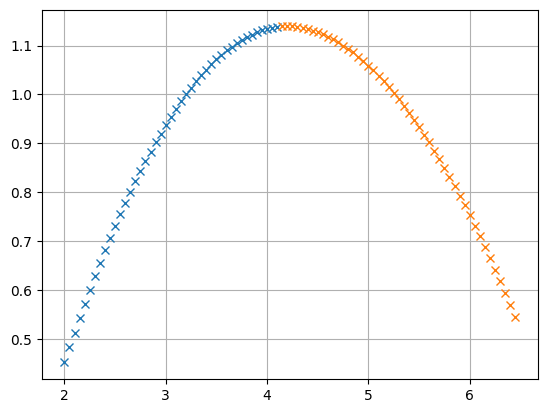

In [49]:
keskmineIndeks = np.argmax(s3)
s3_Algus = s3[:keskmineIndeks]
s3_Lõpp = s3[keskmineIndeks:]
t3_Algus = t3[:keskmineIndeks]
t3_Lõpp = t3[keskmineIndeks:]

plt.plot(t3_Algus, s3_Algus, "x", label = "Vernier' andmed, esimene pool")
plt.plot(t3_Lõpp, s3_Lõpp, "x", label = "Vernier' andmed, teine pool")
plt.grid()
plt.show()

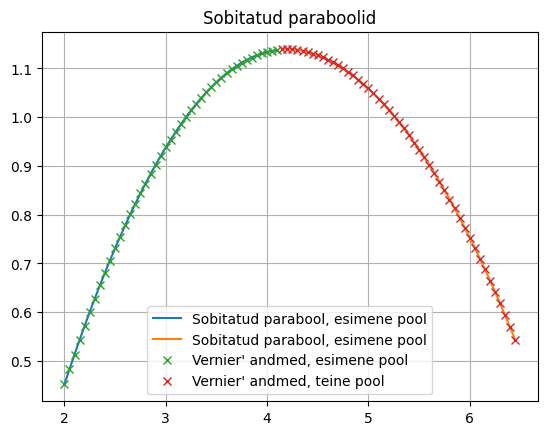

Kiirendus aeglustuval liikumisel:(-0.2899 ± 0.0006) m/s^2 
Kiirendus kiireneval liikumisel: (-0.2246 ± 0.0011) m/s^2 
(veokiirendus + takistuskiirendus)/2 = 0.14493938657296573; (veokiirendus - takistuskiirendus)/2 = 0.11231852593026158
veokiirendus = 0.2572579125032273
takistuskiirendus = 0.03262086064270414
0.03262086064270414
Aeroauto takistusjõud selles katses: 0.0194 ± 0.0001 N
Aeroauto veojõud selles katses: 0.1532 ± 0.0002 N


In [50]:
#s3.shape,np.max(s3),np.argmax(s3)
par1_3, cov1_3 = np.polyfit(t3_Algus, s3_Algus,2, cov = True)
par2_3, cov2_3 = np.polyfit(t3_Lõpp, s3_Lõpp, 2, cov = True)

parabool3_algus = np.poly1d(par1_3)(t3_Algus)
parabool3_lõpp = np.poly1d(par2_3)(t3_Lõpp)
plt.plot(t3_Algus, parabool3_algus, label = "Sobitatud parabool, esimene pool")
plt.plot(t3_Lõpp, parabool3_lõpp, label = "Sobitatud parabool, esimene pool")
plt.title("Sobitatud paraboolid")
plt.plot(t3_Algus, s3_Algus, "x", label = "Vernier' andmed, esimene pool")
plt.plot(t3_Lõpp, s3_Lõpp, "x", label = "Vernier' andmed, teine pool")
plt.legend()
plt.grid()
plt.show()

par1_3, par2_3

määramatus = []
määramatus.append(np.sqrt(np.diag(cov1_3)))
määramatus.append(np.sqrt(np.diag(cov2_3)))
määramatus = np.array(määramatus)
määramatus.shape, määramatus

print('Kiirendus aeglustuval liikumisel:(%2.4f ± %5.4f) m/s^2 ' % (par1_3[0]*2, määramatus[0][0]*1.96*2)) 
print('Kiirendus kiireneval liikumisel: (%2.4f ± %5.4f) m/s^2 ' % (par2_3[0]*2, määramatus[1][0]*1.96*2))
print(f"(veokiirendus + takistuskiirendus)/2 = {np.abs(par1_3[0])}; (veokiirendus - takistuskiirendus)/2 = {np.abs(par2_3[0])}")

veokiirendus = np.abs((par1_3[0] + par2_3[0]))
print(f"veokiirendus = {veokiirendus}")
takistuskiirendus = 2*np.abs(par1_3[0]) - np.abs(veokiirendus)
print(f"takistuskiirendus = {takistuskiirendus}")

F_t = (takistuskiirendus)*(m_v + m_alus)
uF_t = ((m_v)/2) * np.sqrt(määramatus[0][0]**2 + määramatus[1][0]**2)
dF_t = 1.96*uF_t
print(takistuskiirendus)
print ('Aeroauto takistusjõud selles katses: %2.4f ± %5.4f N' %(F_t,dF_t))

F_v = (veokiirendus)*(m_v + m_alus)
uF_v =np.sqrt(((m_a + m_v) * määramatus[0][0])**2 + uF_t**2)
dF_v = 1.96*uF_v
print ('Aeroauto veojõud selles katses: %2.4f ± %5.4f N' %(F_v,dF_v))

## Sobitamine selle fancy meetodiga

In [51]:
vs3_maatriks = np.vstack((v3, s3))
vs3_maatriks.shape

#plt.plot(t3, s3)
#plt.grid()
#plt.show()

(2, 90)

In [52]:
algne_pakkumine2 = algne_pakkumine

result2 = minimize(kaofunktsioon, algne_pakkumine2, args=(t3, vs3_maatriks), method='Nelder-Mead')

parameetrid_opt2 = result2.x
print("Optimized Parameters:", parameetrid_opt2)

result2.fun, result.fun

Optimized Parameters: [-0.26207647  0.00704015  0.0716867   0.1576076   0.02595065  0.06955457]


(0.001664659977962181, 0.0016877611666084324)

In [53]:
print("RELSI KATSE TULEMUSED SELLE FANCY MEETODIGA")
print("relsi katse parameetrid: ", parameetrid_opt2)
print("relsikatse veokiirendus: ", parameetrid_opt2[0])
print("relsikatse takistuskiirendus: ", parameetrid_opt2[1])
print("relsikatse veojõud: ", np.abs(parameetrid_opt2[0]*(m_v + m_alus)))
print("relsikatse takistusjõud: ", parameetrid_opt2[1]*(m_v + m_alus))

RELSI KATSE TULEMUSED SELLE FANCY MEETODIGA
relsi katse parameetrid:  [-0.26207647  0.00704015  0.0716867   0.1576076   0.02595065  0.06955457]
relsikatse veokiirendus:  -0.2620764686542876
relsikatse takistuskiirendus:  0.007040150116431143
relsikatse veojõud:  0.1561110900832995
relsikatse takistusjõud:  0.004193606219854539


In [54]:
vs3_maatriks.T[0], s3.shape, t3.shape

(array([0.636, 0.452]), (90,), (90,))

[]

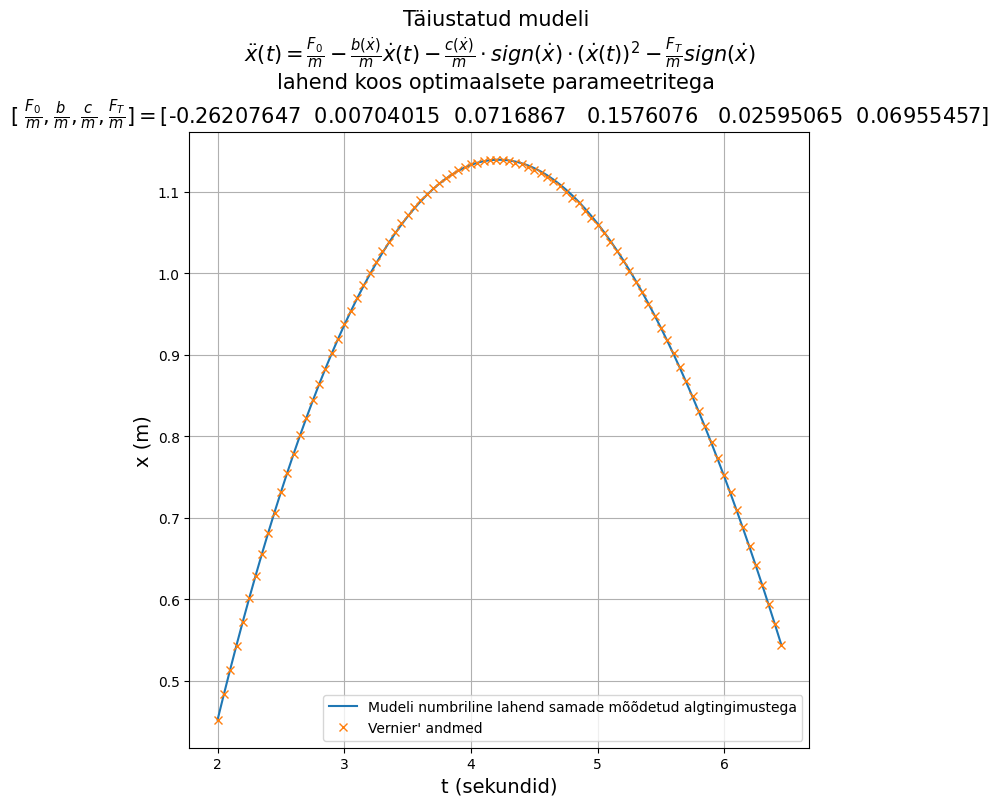

In [68]:
# sobitatud parameetritega lahendi kõver

uuslahend2 = solve_ivp(pakutavDV6, y0=vs3_maatriks[:,0], t_span=[t3[0], t3[-1]],
        t_eval=t3,  args = tuple(parameetrid_opt2))


plt.figure(figsize = (8,8))

pealkiri2 = str("Täiustatud mudeli \n$ \\ddot{x}(t) = \\frac{F_0}{m} - \\frac{b(\\dot{x})}{m} \\dot{x}(t) - \\frac{c(\\dot{x})}{m} \\cdot sign(\\dot{x}) \\cdot (\\dot{x}(t))^2 - \\frac{F_T}{m} sign(\\dot{x})$\nlahend koos optimaalsete parameetritega \n" + 
          r"[ $\frac{F_0}{m}, \frac{b}{m} , \frac{c}{m}, \frac{F_T}{m}] =$" + f"{parameetrid_opt2}")

plt.title(pealkiri2, fontsize = 15)
plt.plot(t3, uuslahend2.y[1], label = "Mudeli numbriline lahend samade mõõdetud algtingimustega")
plt.plot(t3, s3, "x", label = "Vernier' andmed")

plt.ylabel("x (m)", fontsize = 14)
plt.xlabel("t (sekundid)",  fontsize = 14)
plt.legend()
plt.grid()
plt.plot()

[]

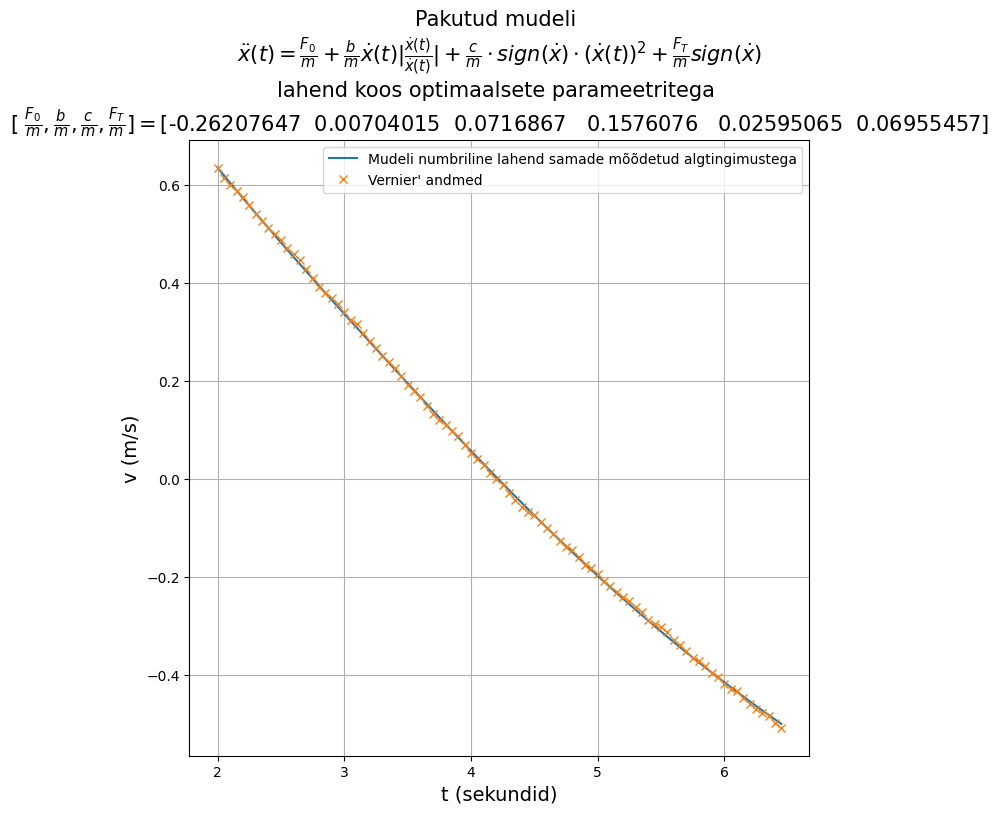

In [200]:
# sobitatud parameetritega lahendi kõver

plt.figure(figsize = (8,8))

plt.title(pealkiri2, fontsize = 15)
plt.plot(t3, uuslahend2.y[0], label = "Mudeli numbriline lahend samade mõõdetud algtingimustega")
plt.plot(t3, v3, "x", label = "Vernier' andmed")

plt.ylabel("v (m/s)", fontsize = 14)
plt.xlabel("t (sekundid)",  fontsize = 14)
plt.legend()
plt.grid()
plt.plot()

In [56]:
np.sum((parabool3_algus - s3_Algus)**2) + np.sum((parabool3_lõpp - s3_Lõpp)**2), np.sum((uuslahend2.y[1] - s3)**2)

(3.1247866679248815e-05, 0.00020989108294795628)

In [57]:
result.x, result2.x

(array([-0.53490139,  0.27040393, -0.02703288,  0.24243115,  0.15094921,
        -0.01798234]),
 array([-0.26207647,  0.00704015,  0.0716867 ,  0.1576076 ,  0.02595065,
         0.06955457]))

In [58]:
jõud = pd.read_csv("jõud.txt", sep='\\s+')
jõud2 = pd.read_csv("jõud2.txt", sep='\\s+')

In [59]:
J1 = np.array(jõud["N"])
J1 = np.array([float(x.replace(",", ".")) for x in J1])
print("esimese jõu mõõtmise katse keskväärtus:", f"{np.mean(J1):.3g} N", "standardhälve:", f"{np.sqrt(np.var(J1)):.2g} N")

esimese jõu mõõtmise katse keskväärtus: 0.145 N standardhälve: 0.038 N


In [62]:
J2 = np.array(jõud2["N"])
J2 = np.array([float(x.replace(",", ".")) for x in J2])
print("teise jõu mõõtmise katse keskväärtus:", f"{np.mean(J2):.3g} N", "standardhälve:", f"{np.sqrt(np.var(J2)):.2g} N")

teise jõu mõõtmise katse keskväärtus: 0.131 N standardhälve: 0.1 N
